In [1]:
import pathlib
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


from src.data_modelling.table_to_graph import database_to_subgraphs
from src.data_modelling.pyg_datasets import sample_relational_distribution

c:\Users\valte\miniconda3\envs\graphs\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Rossmann

In [2]:
G_rossmann = sample_relational_distribution('rossmann-store-sales', 1)

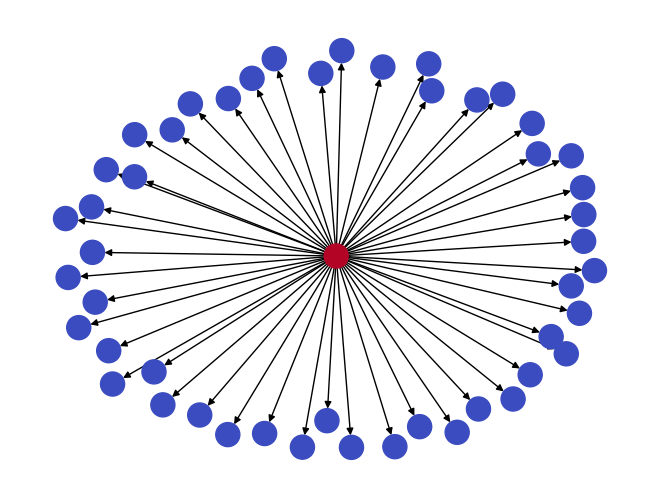

In [3]:
draw_id = 0
color_map = {"test": 0, "store": 1}
node_colors = [color_map[node[1]['node_type']] for node in G_rossmann.nodes(data=True)]

nx.draw(G_rossmann, cmap=plt.get_cmap('coolwarm'), node_color=node_colors)

## Mutagenesis

In [4]:
G_mutagenesis = sample_relational_distribution('mutagenesis', 1)

In [5]:
from src.data.utils import load_metadata
metadata = load_metadata('mutagenesis')

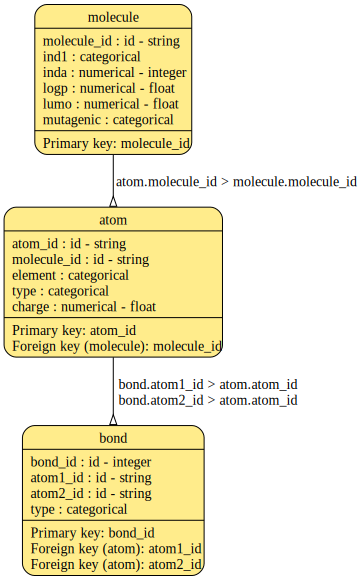

In [15]:
metadata.visualize()

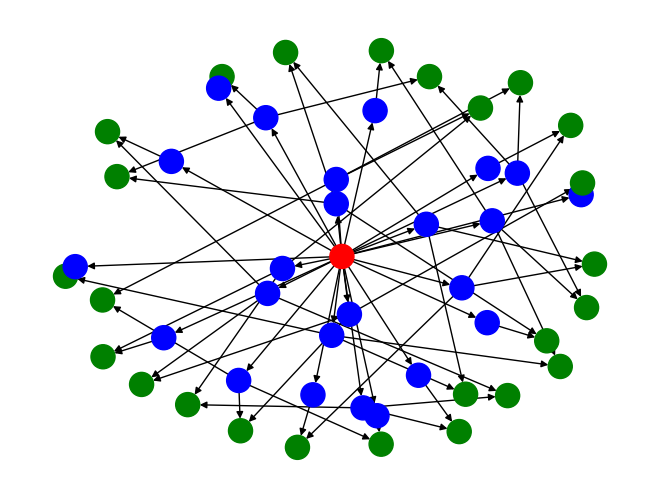

In [7]:
draw_id = 0
color_map = {"molecule": "red", "atom": "blue", "bond": "green"}
node_colors_mutagenesis = [color_map[node[1]['node_type']] for node in G_mutagenesis.nodes(data=True)]

nx.draw(G_mutagenesis, node_color=node_colors_mutagenesis)

## Combine plots

In [8]:
subgraphs, _ = database_to_subgraphs('mutagenesis')

In [12]:
def get_label(G, node_id, fks, p=1):
    node_data = G.nodes[node_id]
    if np.random.rand() > p:
        return ''
    node_label = ''
    for k, v in node_data.items():
        if k == 'node_type':
            continue
        if k in fks:
            continue
        node_label += f'{k}:{v}\n'
    return node_label

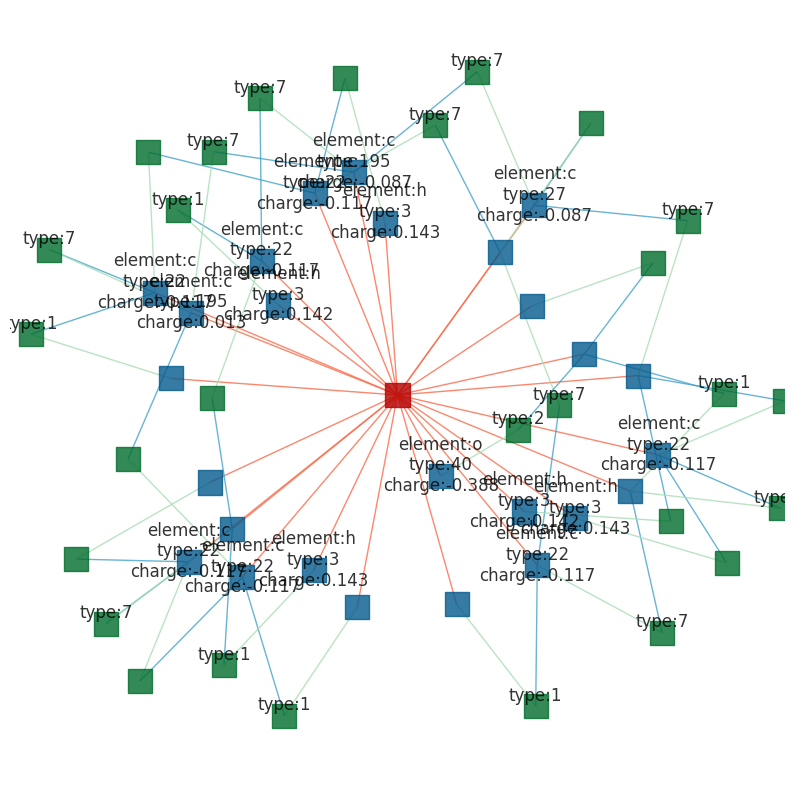

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
G = subgraphs[0]
G = G.to_undirected()
color_map = {"molecule": "#b30000", "atom": "#045a8d", "bond": "#006d2c"}
edge_color_map = {"molecule_id": "#fb6a4a", "atom1_id": "#43a2ca", "atom2_id": "#a8ddb5"}
node_colors = [color_map[node[1]['node_type']] for node in G.nodes(data=True)]
edge_colors = [edge_color_map[edge[2]['edge_type']] for edge in G.edges(data=True)]
labels = {node[0]: get_label(G, node[0], p=0.5, fks=list(edge_color_map)) for node in G.nodes(data=True)}
layout = nx.spring_layout(G)
layout[list(G.nodes)[0]] = np.array([0, 0])
nx.draw(G, 
        pos = layout, ax=ax, 
        labels = labels,
        node_color=node_colors, 
        node_shape="s", 
        alpha=0.8,
        edge_color=edge_colors,
        with_labels=True
        )
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()